In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.data.csv')

In [4]:
df.head(5).T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


### Questions

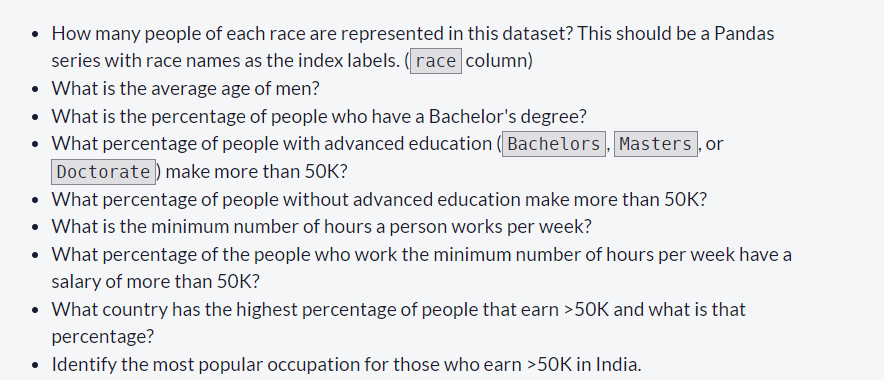

### How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)

In [9]:
race_count = df['race'].value_counts()
race_count

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

### What is the average age of men?

In [105]:
df[df.sex == 'Male']['age'].mean()

39.43354749885268

### What is the percentage of people who have a Bachelor's degree?

In [106]:
round(df.education.value_counts(normalize=True)['Bachelors']*100,1)

16.4

In [127]:
high_edu = df[df['education'].isin(['Bachelors','Masters','Doctorate'])]
high_edu_rich = high_edu[high_edu.salary == '>50K']
herp = round(len(high_edu_rich)/len(high_edu)*100,1)
              
low_edu = df[~df['education'].isin(['Bachelors','Masters','Doctorate'])]
low_edu_rich = low_edu[low_edu.salary == '>50K']
lerp = round(len(low_edu_rich)/len(low_edu)*100,1)



In [129]:
lerp

17.4

In [116]:
len(high_edu),len(low_edu),totel

(7491, 25070, 32561)

In [108]:
df.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

### or

In [23]:
((df.education == 'Bachelors').sum()/df.shape[0])*100

16.44605509658794

In [110]:
len(df)

32561

### What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [45]:
df.query("education in ('Bachelors','Masters','Doctorate')")['salary'].value_counts(normalize=True)['>50K']

0.46535843011613937

In [96]:
df.query("education not in ('Bachelors','Masters','Doctorate')")['salary'].value_counts(normalize=True)['>50K']

0.173713601914639

### What percentage of people without advanced education make more than 50K?

In [97]:
df.query("education not in ('Bachelors','Masters','Doctorate')")['salary'].value_counts(normalize=True)['>50K']

0.173713601914639

### What is the minimum number of hours a person works per week?

In [47]:
df['hours-per-week'].min()

1

In [133]:
 min_work_hours = df['hours-per-week'].min()

# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = df[df['hours-per-week']==min_work_hours]
# num_min_workers

n = num_min_workers[num_min_workers.salary=='>50K']
round(len(n)/len(num_min_workers)*100,1)

10.0

### What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [103]:
df.loc[(df['hours-per-week'] == df['hours-per-week'].min()) & 
df['salary']=='>50K'].shape[0]

0

In [100]:
df.query('("hours-per-week" == 1) & (salary == ">50K")')

TypeError: argument of type 'int' is not iterable

#### What country has the highest percentage of people that earn >50K and what is that percentage?

In [104]:
a = df.groupby('native-country',as_index=False)['salary'].value_counts()
a

,native-country,salary,count
0,?,<=50K,437
1,?,>50K,146
2,Cambodia,<=50K,12
3,Cambodia,>50K,7
4,Canada,<=50K,82
...,...,...,...
77,United-States,>50K,7171
78,Vietnam,<=50K,62
79,Vietnam,>50K,5
80,Yugoslavia,<=50K,10


In [ ]:
totelcount = a.groupby('native-country',as_index=False)['count'].sum()
totelcount

In [84]:
new = pd.merge(a,totelcount,how='left',on='native-country')
new['per'] = new['count_x']/new['count_y']*100

In [90]:
new.loc[new['salary']=='>50K'].sort_values(by='per',ascending=False).head(1)

,native-country,salary,count_x,count_y,per
40,Iran,>50K,18,43,41.860465


#### Identify the most popular occupation for those who earn >50K in India.

In [95]:
df.query('salary == ">50K"')['occupation'].value_counts().head(1)

occupation
Exec-managerial    1968
Name: count, dtype: int64

In [134]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [144]:
country_count = df['native-country'].value_counts()
rich_country_count = df[df['salary']=='>50K']['native-country'].value_counts()
(rich_country_count/country_count).idxmax()


'Iran'

In [147]:
round((rich_country_count/country_count).max()*100,1)

41.9

In [155]:
df[(df['native-country']=='India') & (df['salary']=='>50K')]['occupation'].value_counts().idxmax()

'Prof-specialty'